# Pregled Avtoneta

## Rok Stanič, programiranje 1.

V projektni nalogi bom analiziral podatke, ki sem jih pridobil na spletni strani https://www.avto.net/.

Za vsak avto sem pridobil podatek o:
* Znamka
* Tip
* Leto proizvodnje
* Leto prve registracije
* Starost (novo, rabljeno, itd)
* Menjalnik
* Stevilo vrat
* Gorivo
* Prevoženi kilometri
* Cena
* Konjske moči, velikost motorja.

V analizi se bom dotaknil treh področji.
###  1. Največje in najmanjše vrednosti
###  2. Porazdelitev avtomobilov po različnih podatkih
###  3. Korelacije med vrednostmi 


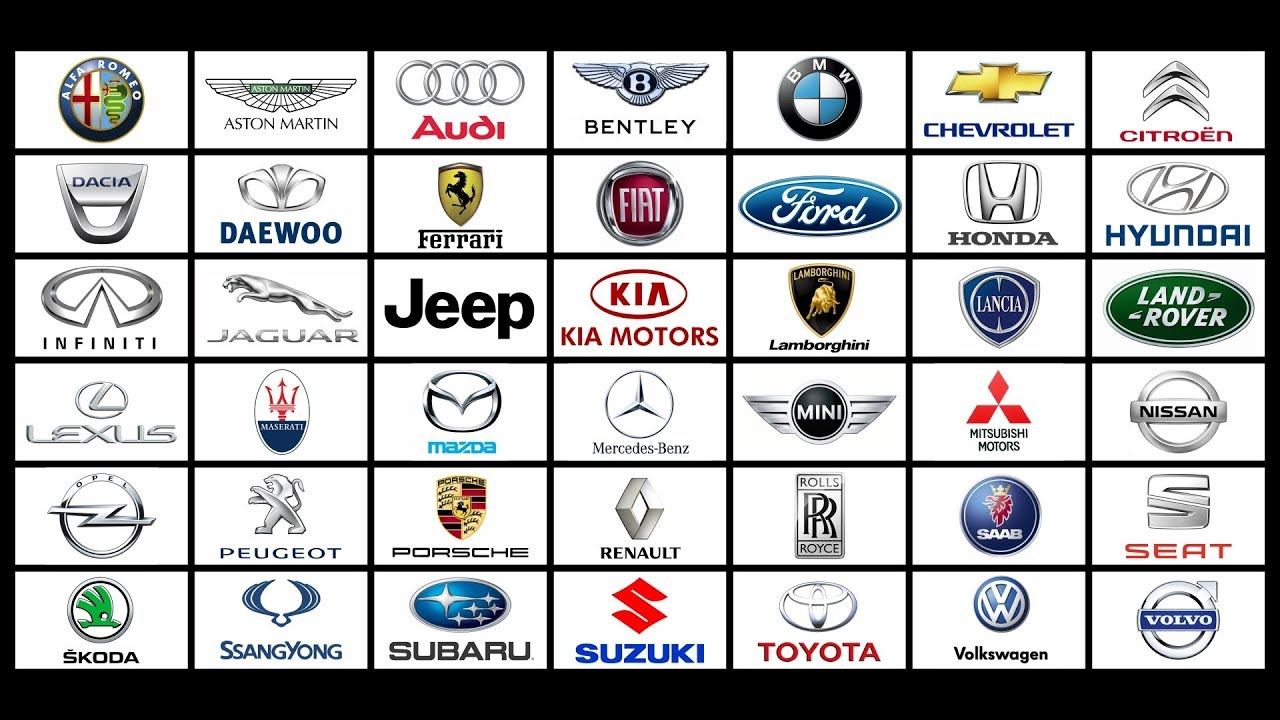

Uvozimo potrebne knjižnice.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
from plotnine import *
import math

Uvozimo podatke in jih nekoliko preoblikujemo v želeno obliko.


In [2]:
# Podatke uvozimo, nekoliko preoblikujemo in 
df = pd.read_json("avtonet1.json")

# ODSTRANI SEZNAME

df["gorivo"] = df["gorivo"].apply(', '.join)
df["prevozeni kilometri"] = df["prevozeni kilometri"].apply(', '.join)
df["leto prozivodnje"] = df["leto prozivodnje"].apply(''.join)
df["starost"] = df["starost"].apply(', '.join)
df["stevilo vrat"] = df["stevilo vrat"].apply(', '.join)
df["menjalnik"] = df["menjalnik"].apply(', '.join)

# SPREMENI OBLIKO PRVE REGISTRACIJE

def preuredi_leto_reg(element):
    if len(element) != 2:
        return None
    else:
        return int(element[0])

df["prva registracija"] = df["prva registracija"].apply(preuredi_leto_reg)

# SPREMENI OBLIKO LETO PROIZVODNJE
def preuredi_leto_proizv(element):
    if element == "null" or element == "":
        return None
    else:
        return element
    
df["leto prozivodnje"] = df["leto prozivodnje"].apply(preuredi_leto_proizv)  

# SPREMENI OBLIKO PREVOZENI KM

def preuredi_prev_km(element):
    if  element == "":
        return None
    else:
        return element


df["prevozeni kilometri"] = df["prevozeni kilometri"].apply(preuredi_prev_km) 

# ODSTRANI IZJEME

dovoljeno_gorivo = ["diesel motor","bencinski motor","hibridni pogon","elektro pogon","LPG avtoplin"]        
dovoljen_menjalnik = ["avtomatski menjalnik","avtomatski menjalnik / tiptronic", 
              "rocni menjalnik (5 pr.)","rocni menjalnik (6 pr.)","polavtomatski menjalnik","rocni menjalnik (4 pr.)",
             "rocni menjalnik"] 
napacne = []
for i in range(0,1000):
    if((df["menjalnik"][i] not in dovoljen_menjalnik) or (df["gorivo"][i] not in dovoljeno_gorivo) or(len(df["KM; kW; ccm"][i]) != 3)):
        napacne.append(i)
        
df = df.drop(df.index[napacne])


Najprej si poglejmo obliko __DF__

In [3]:
df

,znamka,tip,cena,prva registracija,leto prozivodnje,prevozeni kilometri,KM; kW; ccm,stevilo vrat,gorivo,menjalnik,starost
0,BMW,serija X3:,21900.0,2015.0,2015,112000,"[140, 190, 1995]",5,diesel motor,avtomatski menjalnik / tiptronic,rabljeno
1,Citroen,C4 Grand Picasso,8999.0,2015.0,2015,157845,"[121, 165, 1598]",5,bencinski motor,avtomatski menjalnik,"rabljeno, ima jamstvo"
2,Volvo,XC60,24999.0,2016.0,2016,138053,"[162, 220, 2400]",5,diesel motor,avtomatski menjalnik,"rabljeno, ima garancijo"
3,Audi,A5,32390.0,2018.0,2018,102000,"[140, 190, 1968]",5,diesel motor,avtomatski menjalnik,rabljeno
4,Mercedes-Benz,CLK-Razred,4690.0,2003.0,2003,254490,"[125, 170, 2685]",2,diesel motor,avtomatski menjalnik,"rabljeno, ima garancijo"
...,...,...,...,...,...,...,...,...,...,...,...
995,Nissan,Qashqai,8790.0,2013.0,2013,162000,"[81, 110, 1461]",5,diesel motor,rocni menjalnik (6 pr.),rabljeno
996,Volkswagen,Golf,5590.0,2009.0,2009,122000,"[59, 80, 1390]",5,bencinski motor,rocni menjalnik (5 pr.),rabljeno
997,Volkswagen,Passat,2900.0,2005.0,2005,225000,"[96, 131, 1896]",5,diesel motor,rocni menjalnik (6 pr.),rabljeno
998,Volkswagen,up!,6590.0,2014.0,2014,99000,"[44, 60, 999]",5,bencinski motor,rocni menjalnik (5 pr.),rabljeno


__Najdražji avtomobili__

In [4]:
# 10 NAJDRAŽJIH AVTOV
df.nlargest(10, columns=['cena'])

,znamka,tip,cena,prva registracija,leto prozivodnje,prevozeni kilometri,KM; kW; ccm,stevilo vrat,gorivo,menjalnik,starost
746,BMW,M5,97650.0,2019.0,2018,43000,"[441, 600, 4395]",4,bencinski motor,avtomatski menjalnik,"rabljeno, ima garancijo, ima jamstvo"
75,Mercedes-Benz,GLE-Razred,79990.0,2020.0,2020,6060,"[180, 245, 1950]",5,diesel motor,avtomatski menjalnik,"rabljeno, ima garancijo, ima jamstvo"
701,BMW,M4,77250.0,2017.0,2017,30500,"[331, 450, 2979]",2,bencinski motor,avtomatski menjalnik,"rabljeno, ima garancijo"
910,Mercedes-Benz,V-Razred,74999.0,2019.0,2019,50000,"[176, 239, 1950]",5,diesel motor,avtomatski menjalnik / tiptronic,"rabljeno, ima garancijo, ima jamstvo"
861,Mercedes-Benz,CLS-Razred,61500.0,2018.0,2018,55000,"[210, 286, 2995]",4,diesel motor,avtomatski menjalnik,"rabljeno, ima garancijo, ima jamstvo"
114,Mercedes-Benz,S-Razred,58900.0,2017.0,2017,34500,"[190, 258, 2987]",4,diesel motor,avtomatski menjalnik,rabljeno
95,Mercedes-Benz,GLE-Razred,54900.0,2018.0,2018,29163,"[190, 258, 2987]",5,diesel motor,avtomatski menjalnik,"rabljeno, ima jamstvo"
918,BMW,serija 7:,51990.0,2018.0,2018,55000,"[195, 265, 2993]",4,diesel motor,avtomatski menjalnik / tiptronic,rabljeno
25,Audi,Q5,50000.0,2018.0,None,41000,"[210, 286, 2967]",5,diesel motor,avtomatski menjalnik / tiptronic,"rabljeno, ima garancijo"
52,Audi,A6,49990.0,2019.0,2019,30450,"[150, 204, 1968]",5,diesel motor,avtomatski menjalnik,"rabljeno, ima garancijo"


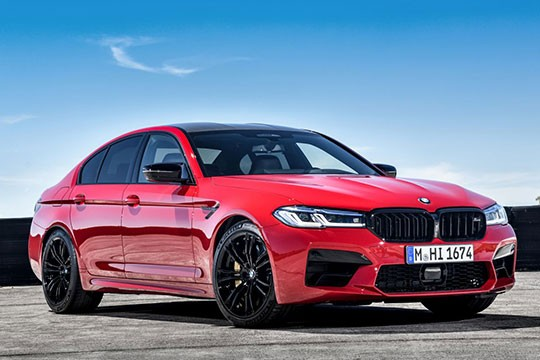

__Najcenejši avtomobili__

In [5]:
# 10 NAJCENEJŠIH AVTOV
df.nsmallest(10, columns=['cena'])

,znamka,tip,cena,prva registracija,leto prozivodnje,prevozeni kilometri,KM; kW; ccm,stevilo vrat,gorivo,menjalnik,starost
715,Renault,Clio,150.0,1998.0,None,190000,"[43, 58, 1149]",3,bencinski motor,rocni menjalnik (5 pr.),rabljeno
728,Fiat,Punto,200.0,2002.0,2002,117000,"[44, 60, 1242]",5,bencinski motor,rocni menjalnik (5 pr.),rabljeno
958,Ford,Mondeo,200.0,2003.0,2003,320000,"[85, 116, 1998]",5,diesel motor,rocni menjalnik (5 pr.),rabljeno
582,Rover,serija 400:,250.0,1999.0,None,160000,"[76, 103, 1396]",4,bencinski motor,rocni menjalnik (5 pr.),rabljeno
945,Renault,Clio,290.0,2000.0,2000,230000,"[43, 58, 1149]",3,bencinski motor,rocni menjalnik (5 pr.),rabljeno
327,Renault,Scenic,300.0,2006.0,None,340000,"[96, 131, 1870]",5,diesel motor,rocni menjalnik (6 pr.),rabljeno
931,Ford,Fiesta,300.0,2006.0,None,212000,"[59, 80, 1388]",5,bencinski motor,rocni menjalnik (5 pr.),rabljeno
376,Opel,Vectra,350.0,2004.0,2004,323000,"[74, 101, 1995]",5,diesel motor,rocni menjalnik (5 pr.),rabljeno
436,Renault,Clio,350.0,2000.0,None,200000,"[55, 75, 1390]",5,bencinski motor,rocni menjalnik (5 pr.),rabljeno
884,Peugeot,206,350.0,2000.0,None,120000,"[45, 61, 1100]",3,bencinski motor,rocni menjalnik (5 pr.),rabljeno


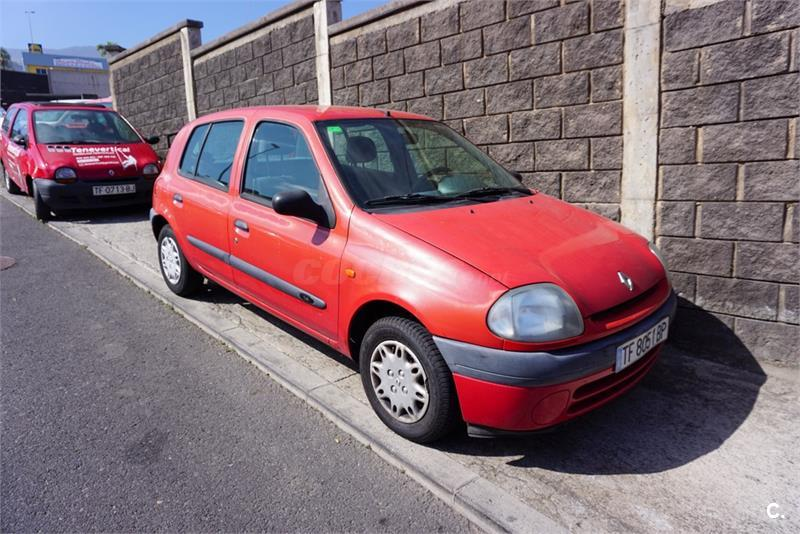

__Najstarejši avtomobili__

In [6]:
#NAJSTAREJŠI AVTI
df2 = df[df["leto prozivodnje"] != "null"]
df2 = df2[df2["leto prozivodnje"] != ""]
df3 = df2.sort_values(by=['leto prozivodnje'])
df3[0:10]

,znamka,tip,cena,prva registracija,leto prozivodnje,prevozeni kilometri,KM; kW; ccm,stevilo vrat,gorivo,menjalnik,starost
754,BMW,2002,10700.0,1958.0,1958,35000,"[9, 12, 145]",2,bencinski motor,rocni menjalnik (4 pr.),rabljeno
527,Zastava,750,6200.0,1976.0,1976,None,"[18, 24, 750]",2,bencinski motor,rocni menjalnik (4 pr.),rabljeno
277,Mercedes-Benz,E-Razred,3500.0,1987.0,1987,580000,"[54, 73, 2000]",5,diesel motor,rocni menjalnik (5 pr.),rabljeno
384,Volkswagen,Golf,5700.0,1990.0,1990,None,"[40, 54, 1588]",3,diesel motor,rocni menjalnik (4 pr.),rabljeno
496,Volkswagen,Golf,1650.0,1991.0,1991,230000,"[47, 64, 1896]",5,diesel motor,rocni menjalnik (5 pr.),rabljeno
849,Audi,100,370.0,1992.0,1992,272500,"[85, 116, 1984]",4,bencinski motor,rocni menjalnik (5 pr.),rabljeno
237,BMW,serija 3:,800.0,1994.0,1994,250000,"[75, 102, 1596]",4,bencinski motor,rocni menjalnik (5 pr.),rabljeno
310,Volkswagen,Transporter,4100.0,1995.0,1995,115000,"[57, 77, 2370]",4,diesel motor,rocni menjalnik (5 pr.),rabljeno
828,Audi,A6,490.0,1996.0,1996,331000,"[103, 140, 2461]",4,diesel motor,rocni menjalnik (6 pr.),rabljeno
360,Volkswagen,Transporter,7900.0,1996.0,1996,68000,"[81, 110, 2461]",4,bencinski motor,rocni menjalnik (5 pr.),rabljeno


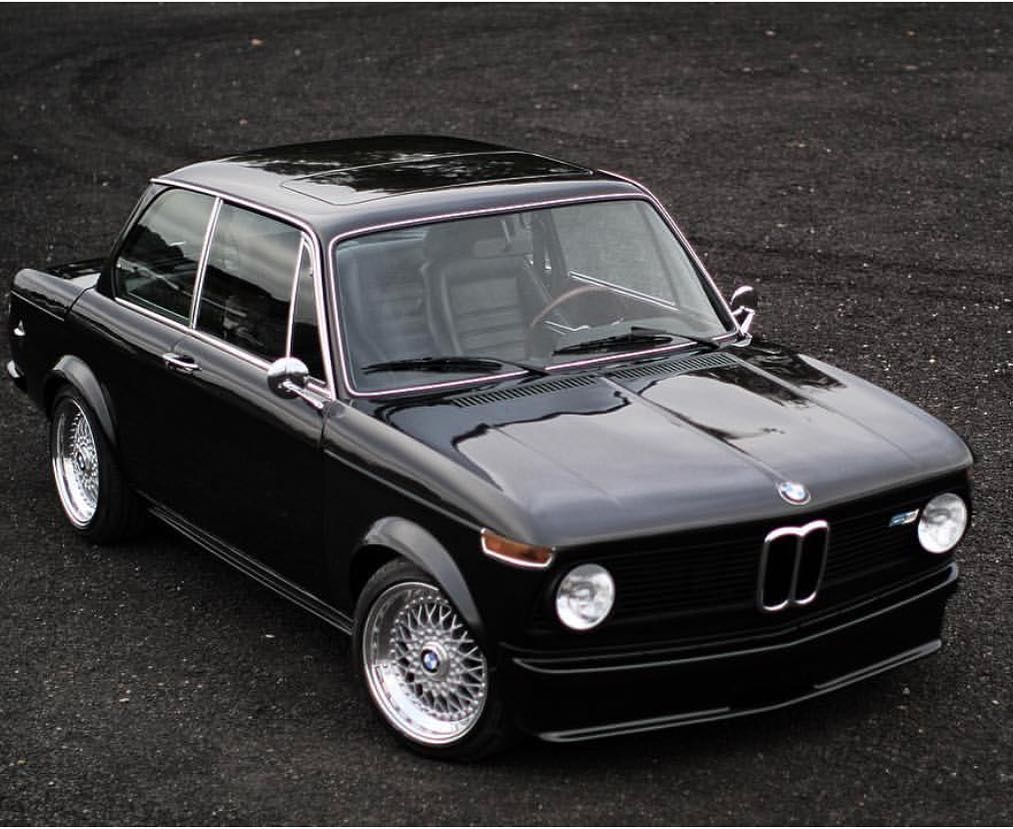

__Avtomobili z največ konjskimi močmi__

In [7]:
# NAJMOČNEJŠI AVTI
KM = []

for i in range(0,len(df.index)):
    KM.append(float(df['KM; kW; ccm'].iloc[i][0]))

df3 = df
df3["KM"] = KM
df3.nlargest(10, columns=['KM'])

,znamka,tip,cena,prva registracija,leto prozivodnje,prevozeni kilometri,KM; kW; ccm,stevilo vrat,gorivo,menjalnik,starost,KM
746,BMW,M5,97650.0,2019.0,2018,43000,"[441, 600, 4395]",4,bencinski motor,avtomatski menjalnik,"rabljeno, ima garancijo, ima jamstvo",441.0
701,BMW,M4,77250.0,2017.0,2017,30500,"[331, 450, 2979]",2,bencinski motor,avtomatski menjalnik,"rabljeno, ima garancijo",331.0
460,Mercedes-Benz,CL-Razred,17990.0,2007.0,2007,194000,"[285, 387, 5461]",2,bencinski motor,avtomatski menjalnik / tiptronic,rabljeno,285.0
836,Mercedes-Benz,S-Razred,7950.0,2006.0,2006,388000,"[285, 387, 5461]",4,bencinski motor,avtomatski menjalnik / tiptronic,rabljeno,285.0
988,BMW,serija X6:,49990.0,2015.0,2015,162000,"[280, 381, 2993]",5,diesel motor,avtomatski menjalnik,rabljeno,280.0
986,Mercedes-Benz,A-Razred,30990.0,2014.0,2014,119000,"[265, 360, 1991]",5,bencinski motor,avtomatski menjalnik,rabljeno,265.0
831,BMW,M3,19999.0,2002.0,2002,170000,"[252, 343, 3246]",2,bencinski motor,rocni menjalnik (6 pr.),rabljeno,252.0
57,Honda,Civic,33490.0,2018.0,2018,27800,"[235, 320, 1996]",5,bencinski motor,rocni menjalnik (6 pr.),"rabljeno, ima garancijo, ima jamstvo",235.0
79,Honda,Civic,33960.0,2017.0,None,37403,"[235, 320, 1996]",5,bencinski motor,rocni menjalnik (6 pr.),"rabljeno, ima garancijo",235.0
102,Audi,A6,31900.0,2015.0,2015,113155,"[235, 320, 2967]",4,diesel motor,avtomatski menjalnik / tiptronic,"rabljeno, ima garancijo, ima jamstvo",235.0


__Avtomobili z najmanj konjskimi močmi__

In [8]:
# NAJŠIBKEJIŠI AVTI
df3.nsmallest(10, columns=['KM'])

,znamka,tip,cena,prva registracija,leto prozivodnje,prevozeni kilometri,KM; kW; ccm,stevilo vrat,gorivo,menjalnik,starost,KM
754,BMW,2002,10700.0,1958.0,1958,35000,"[9, 12, 145]",2,bencinski motor,rocni menjalnik (4 pr.),rabljeno,9.0
527,Zastava,750,6200.0,1976.0,1976,None,"[18, 24, 750]",2,bencinski motor,rocni menjalnik (4 pr.),rabljeno,18.0
914,Smart,city coupe,1500.0,2002.0,None,179000,"[33, 45, 599]",3,bencinski motor,avtomatski menjalnik / tiptronic,rabljeno,33.0
782,Volkswagen,Polo,990.0,2002.0,2002,82000,"[37, 50, 999]",5,bencinski motor,rocni menjalnik (5 pr.),rabljeno,37.0
384,Volkswagen,Golf,5700.0,1990.0,1990,None,"[40, 54, 1588]",3,diesel motor,rocni menjalnik (4 pr.),rabljeno,40.0
124,Renault,Twingo,500.0,1999.0,1999,None,"[43, 58, 1149]",3,bencinski motor,rocni menjalnik (5 pr.),rabljeno,43.0
206,Renault,Clio,2950.0,2009.0,2009,146279,"[43, 58, 1149]",5,bencinski motor,rocni menjalnik (5 pr.),"rabljeno, ima garancijo, ima jamstvo",43.0
350,Renault,Clio,380.0,2001.0,2001,198000,"[43, 58, 1149]",5,bencinski motor,rocni menjalnik (5 pr.),rabljeno,43.0
715,Renault,Clio,150.0,1998.0,None,190000,"[43, 58, 1149]",3,bencinski motor,rocni menjalnik (5 pr.),rabljeno,43.0
744,Renault,Clio,1400.0,2002.0,2002,39870,"[43, 58, 1149]",3,bencinski motor,rocni menjalnik (5 pr.),rabljeno,43.0


__Avtomobili z največ prevoženimi kilometri__

In [9]:
df1 = df
df1["prevozeni kilometri"] = pd.to_numeric(df1["prevozeni kilometri"])
df1.nlargest(10, columns=["prevozeni kilometri"])

,znamka,tip,cena,prva registracija,leto prozivodnje,prevozeni kilometri,KM; kW; ccm,stevilo vrat,gorivo,menjalnik,starost,KM
781,Mercedes-Benz,E-Razred,2150.0,2004.0,2004,594000.0,"[130, 177, 2685]",5,diesel motor,avtomatski menjalnik,rabljeno,130.0
277,Mercedes-Benz,E-Razred,3500.0,1987.0,1987,580000.0,"[54, 73, 2000]",5,diesel motor,rocni menjalnik (5 pr.),rabljeno,54.0
933,BMW,serija 5:,4999.0,2004.0,2003,504000.0,"[160, 218, 2993]",4,diesel motor,rocni menjalnik (6 pr.),rabljeno,160.0
689,BMW,serija 3:,2850.0,2006.0,2006,500000.0,"[120, 163, 1995]",5,diesel motor,rocni menjalnik (6 pr.),rabljeno,120.0
723,Audi,A4,2350.0,2003.0,2003,495690.0,"[96, 131, 1896]",5,diesel motor,rocni menjalnik (5 pr.),"rabljeno, ima garancijo",96.0
974,Audi,A4,890.0,1999.0,1999,470000.0,"[66, 90, 1896]",4,diesel motor,rocni menjalnik (5 pr.),rabljeno,66.0
590,BMW,serija 3:,2500.0,2005.0,2005,454159.0,"[110, 150, 1995]",5,diesel motor,avtomatski menjalnik,rabljeno,110.0
275,BMW,serija 5:,4000.0,2004.0,2004,450000.0,"[120, 163, 2497]",4,diesel motor,avtomatski menjalnik / tiptronic,rabljeno,120.0
195,Volvo,S80,4950.0,2006.0,2006,440073.0,"[136, 185, 2400]",4,diesel motor,avtomatski menjalnik,"rabljeno, ima garancijo",136.0
773,Volkswagen,Sharan,3900.0,2009.0,2009,438745.0,"[85, 116, 1896]",5,diesel motor,rocni menjalnik (6 pr.),rabljeno,85.0


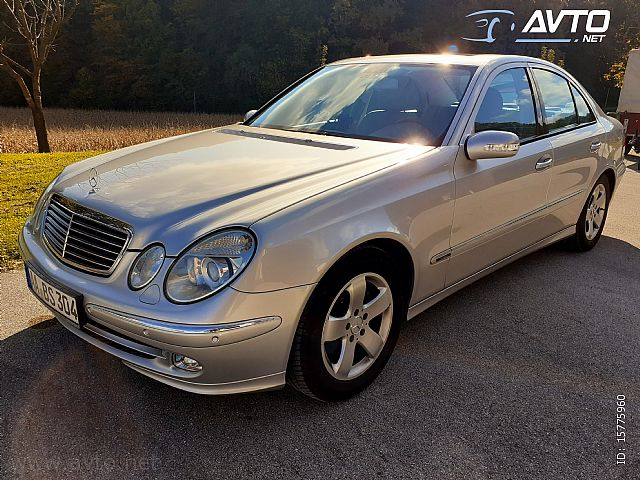

__Skupna vrednost avtomobilov__

In [10]:
# Skupna vrednost 
pd.to_numeric(df["cena"])

str(df['cena'].sum()) + " €"

'10873958.0 €'

__Povprečna vrednost avtomobilov__

In [11]:
# Povprečna vrednost
str(round(df['cena'].sum() / len(df[numpy.isnan(df["cena"])== False].index))) + " €"

'11315 €'

V svetu marketinga že nekaj časa velja, da je pri cenah zadnja števka pogosto enaka 9. Lahko se vprašam ali je tako tudi pri cenah avtovmobilov? Zaradi same višine cen pričakujemo tudi veliko število pojavitev števke 0. 

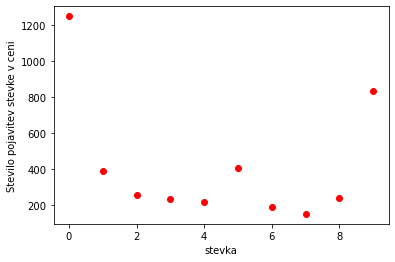

In [12]:
k=0
count = [0,0,0,0,0,0,0,0,0,0]
unique = range(0,10)
len(df.index)
df2 = df[df['cena'].notna()]
for i in range(0,len(df2.index)):
    for j in range(0,(len(str(df2["cena"].iloc[i]))-2)):
        count[int(float(str(df2["cena"].iloc[i])[j]))] += 1
plt.plot(unique, count,"ro")
plt.ylabel('Stevilo pojavitev stevke v ceni')
plt.xlabel('stevka')
plt.show() 

Vidimo, da je števka 0 v občutnem vodstvu, števka 9 pa daleč pred naslednjo zasledovalko, kar potrtjuje naša predvidevanja

Poglejmo si __porazdelitev__ 10-ih najbolj pogostih avtomobilov po __znamkah__, ter 10 najbolj pogostih __tipov__ avtomobilov.

Text(0.5, 1.0, 'Porazdelitev 10 najbolj pogostih tipov avtomobilov')

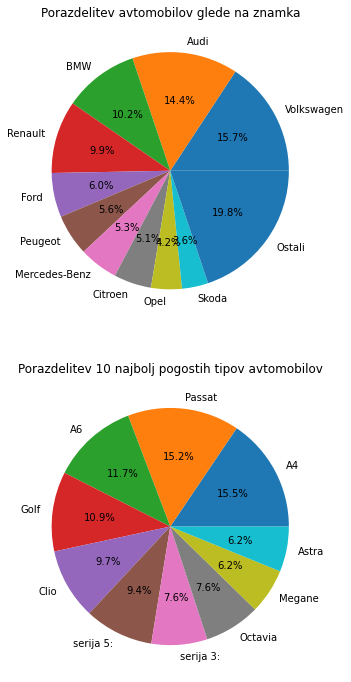

In [13]:

fig, (x1,x2) = plt.subplots(2,1,figsize=(10,12)) # 10 največkrat pojavljenih 

vek_znamke = list(df['znamka'].value_counts()[0:10])
vek_znamke.append(sum(df['znamka'].value_counts()[10:len(df['znamka'].value_counts())]))
znamke = df['znamka'].value_counts().index.tolist()[0:10]
znamke.append("Ostali")
x1.pie(vek_znamke,labels=znamke , autopct='%1.1f%%')

vek_znamke = list(df['tip'].value_counts()[0:10])
znamke = df['tip'].value_counts().index.tolist()[0:10]

x2.pie(vek_znamke,labels=znamke , autopct='%1.1f%%')

x1.set_title('Porazdelitev avtomobilov glede na znamka')
x2.set_title('Porazdelitev 10 najbolj pogostih tipov avtomobilov')



Iz grafa razberemo, da je na avtonetu največ nemških znamk Volkswagen, Audi in BMW, ki skupaj predstavljajo kar 45 % vseh avtomobilov. Iz grafa lahko razberemo še to, da je na Avtonetu relativno malo znamk predstavlja velik odstotek, saj preostale znamke, ki niso poimensko oznančene na grafu, predstaljajo le petino vseh avtomobilov.

Podobno zgodbo vidimo tudi pri porazdelitvi tipov, zanimiv podatek je, da 10 najbolj pogostih tipov predstavlja približno 35 % vseh avtomobilov.

Podatek, ki nas zanima je kako stari avtomobili so na avtonetu najbolj pogosti.

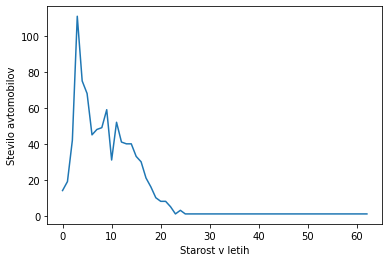

In [14]:
starost = []
for i in range(0,len(df["leto prozivodnje"])):
    if(df["leto prozivodnje"].iloc[i] != None) :
        starost.append(2020 - int(df["leto prozivodnje"].iloc[i]))
unique, counts = numpy.unique(starost, return_counts=True)
plt.plot(unique, counts)
plt.xlabel('Starost v letih')
plt.ylabel('Stevilo avtomobilov')
plt.show()

Iz grafa vidimo, da je novih avtomobilov presenetljivo malo. Največ je avtomobilov starih 3 leta, od tam naprej pa nekako linearno pada do avtomobilov starih 20 let.

Zanima nas, kakšno je razmerje pri avtomobilih med velikostjo motorja in konjskimi močmi. 

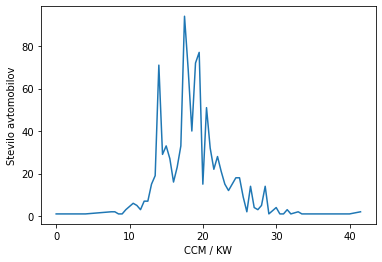

In [15]:
# RAZMERJE MED CCM IN KW
razmerje =[]
for i in range(0,len(df["leto prozivodnje"])):
    if(len(df["KM; kW; ccm"].iloc[i]) == 3):
        raz  = (int(df["KM; kW; ccm"].iloc[i][2])  /  int(df["KM; kW; ccm"].iloc[i][0])) // 0.5
        raz /=2
        razmerje.append(raz)
unique, counts = numpy.unique(numpy.array(razmerje), return_counts=True)
plt.plot(unique, counts)
plt.xlabel('CCM / KW')
plt.ylabel('Stevilo avtomobilov')
plt.show()        

Porazdelitev razmerja spominja na normalno porazdelitv z približno pričakovano vrednostjo 18.

Poglejmo si še porazdelitev avtomobilov glede na konjske moči.

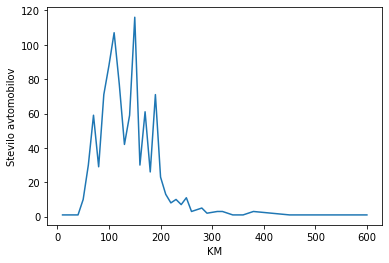

In [16]:
# Stevilo Avtov glede na KM 
razmerje =[]
for i in range(0,len(df["leto prozivodnje"])):
    if(len(df["KM; kW; ccm"].iloc[i]) == 3):
        raz  = int(df["KM; kW; ccm"].iloc[i][1]) // 10
        raz *= 10
        razmerje.append(raz)
unique, counts = numpy.unique(numpy.array(razmerje), return_counts=True)
plt.plot(unique, counts)
plt.xlabel('KM')
plt.ylabel('Stevilo avtomobilov')
plt.show()   

Večina avtomobilov ima nekje od 100 - 200 KM.

Poglejmo si v kakšnem razmerju sta cena in prevozeni kilometri, nekako pricačujemo, da bo cena nižja, če bo avto imel veliko prevoženih kilometrov.

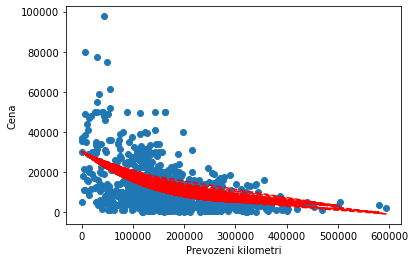

In [17]:
# CENA / PREVOZENI KM
cena = []
prevozeni_km = []
for i in range(0,len(df["znamka"])):
    if((df["prevozeni kilometri"].iloc[i]!= None) & (math.isnan(df["cena"].iloc[i]) ==  False)):
        if math.isnan(df["prevozeni kilometri"].iloc[i]) == False:
            cena.append(df["cena"].iloc[i])
            prevozeni_km.append(int(df["prevozeni kilometri"].iloc[i]))
            

x = prevozeni_km
y = cena
plt.scatter(x, y)

z = numpy.polyfit(x, y, 3)
p = numpy.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Prevozeni kilometri')
plt.ylabel('Cena')

plt.show()

Cena in prevoženi kilometri so (v popvrečju) po pričakovanjih v obratnem sorazmerju

Lahko raziščemo še razmerje med ceno in letom proizvodnje,pričakujemo,da bodo novejši avtomobili imeli višje cene.

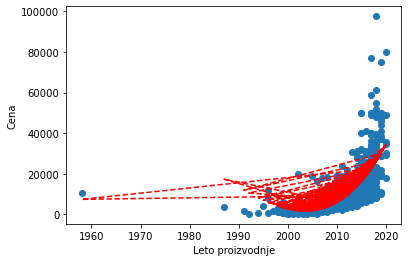

In [18]:
# CENA / LETO PROIZVODNJE
cena = []
leto_proizvodnje = []
for i in range(0,len(df["leto prozivodnje"])):
    if((df["leto prozivodnje"].iloc[i] != None) & (math.isnan(df["cena"].iloc[i]) == False)):
        if math.isnan(df["prevozeni kilometri"].iloc[i]) == False:
            cena.append(df["cena"].iloc[i])
            leto_proizvodnje.append(int(df["leto prozivodnje"].iloc[i]))
x = leto_proizvodnje
y = cena
plt.scatter(x, y)

z = numpy.polyfit(x, y, 3)
p = numpy.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Leto proizvodnje')
plt.ylabel('Cena')

plt.show()

Iz grafa razberemo, da so novejši avti praviloma dražji.

Zanima nas, katera znamka avtomobilov je najdražja in ali to pomeni, da so te avtomobili najbolj "sveži".

[Text(0, 0.5, ''), Text(0.5, 0, 'Cena')]

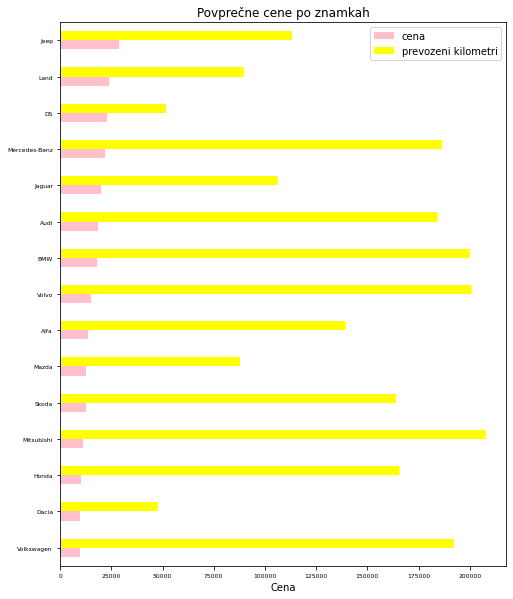

In [19]:
df2 = df.groupby("znamka")
df2 = df2.mean("cena").sort_values("cena", ascending = False)
df2 = df2.drop(['prva registracija', "KM"], axis=1)
df2[:15].sort_values("cena").plot.barh(figsize=(8,10), fontsize=6, color =  ["pink","yellow","red"],
                                title = 'Povprečne cene po znamkah').set(ylabel = '', 
                                                                                    xlabel = 'Cena')

Iz grafa razberemo, da saj v povprečju korelacije med najdražjimi znamkami in njihovo porabljenostjo ni očitne korelacije.

Lahko se vprašamo, katera znamka avotomobilov ima v povprečju avtomobile z največ konjskimi močmi.

[Text(0, 0.5, ''), Text(0.5, 0, 'Konjske moci')]

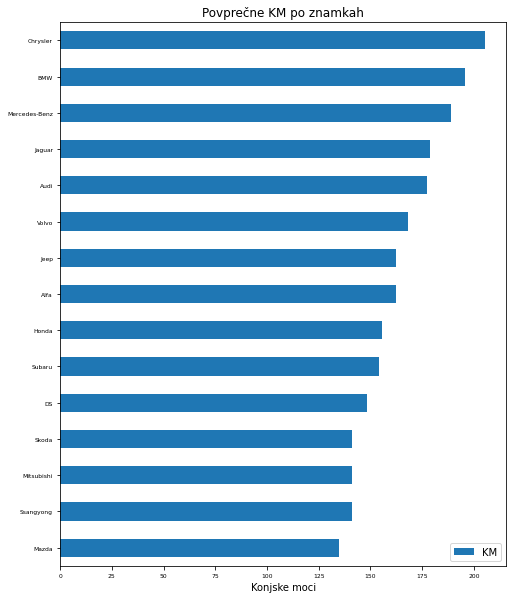

In [20]:
df3 = df
KM = []
mankajoci= []
for i in range(0,len(df.index)):
    if(len(df["KM; kW; ccm"].iloc[i])==3):
        KM.append(int(df["KM; kW; ccm"].iloc[i][1]))
    else:
        mankajoci.append(i)

df3 = df3.drop(df3.index[mankajoci])
df3["KM"] = KM
df3 = df3.groupby(['znamka'])
df3 = df3.mean("KM").sort_values("KM", ascending = False)
df3 = df3.drop(['cena', "prva registracija","prevozeni kilometri"], axis=1)

df3[:15].sort_values("KM").plot.barh(figsize=(8,10), fontsize=6, 
                                title = 'Povprečne KM po znamkah').set(ylabel = '', xlabel = 'Konjske moci')


Vidimo, da je v presenetljivem vodstvu Chrysler (morda ni reprezentativen zaradi majhnega vzorca), nato pa sledijo pričakovanje nemške znamke. 

V naslednjem grafu si bomo ogledali, starost avtomobila pri prvi registraciji

[Text(0.5, 0, 'Starost v letih pri registraciji'),
 Text(0, 0.5, 'Stevilo avtomobilov')]

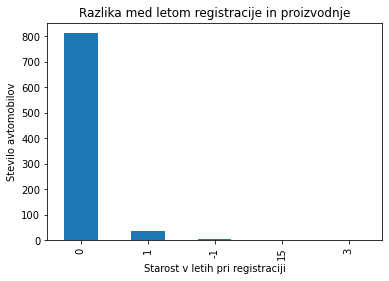

In [21]:
df2 = df[df["prva registracija"] != None]
df2 = df2[df2["leto prozivodnje"] != None]
df2["prva registracija"] = pd.to_numeric(df2["prva registracija"])
df2["leto prozivodnje"] = pd.to_numeric(df2["leto prozivodnje"])
razlika=[]
for i in range(0,len(df2["leto prozivodnje"])):
    if (math.isnan(df2["leto prozivodnje"].iloc[i])== False) and (math.isnan(df2["prva registracija"].iloc[i])== False):
        razlika.append(int(df2["prva registracija"].iloc[i])-int(df2["leto prozivodnje"].iloc[i]))

razlikadf = {"razlika" : razlika}   

razlikadf = pd.DataFrame(razlikadf, columns = ["razlika"])    

razlikadf["razlika"].value_counts().plot.bar(
    title = 'Razlika med letom registracije in proizvodnje').set(xlabel = 'Starost v letih pri registraciji', ylabel = "Stevilo avtomobilov")

Pri večini avtomobilov se leto proizvodnje in prve registracije ujema. Iz grafa pa se vidi tudi človeška napaka pri vnosu podatkov, saj naj bi nekateri avtomobili bili registrirani prej, kot proizvejeni.

Avtomobile lahko grupiramo tudi po tipih motorja, poglejmo si ceno in prevozene kilometre glede na omenjeno grupiranje.

[Text(0, 0.5, ''), Text(0.5, 0, '')]

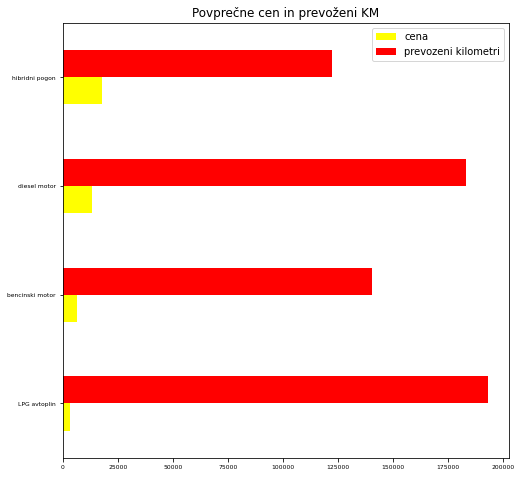

In [28]:
# PRI tipih ki se pojavljo vsaj 10 krat kje je njavečja varianca pri starosti?
df2 = df
df3 =  df2.groupby("gorivo").mean("cena")
df3["KM"] =df3["KM"] *100
df3 = df3.drop(["prva registracija","KM"], axis=1)
df3.sort_values("cena").plot.barh(figsize=(8,8), fontsize=6,  color =  ["yellow","red","blue"],
                                title = 'Povprečne cen in prevoženi KM').set(ylabel = '', xlabel = '')


Najdražji so avtomobili z hibridnim pogonom, sledijo diesli in bencinarji.

In [ ]:
Ali je pri avtih, ki imajo velik standardni odklon pri cenah tudi velik standardni odklon pri kategorijah, ki na ceno vplivajo?

[Text(0, 0.5, ''), Text(0.5, 0, '')]

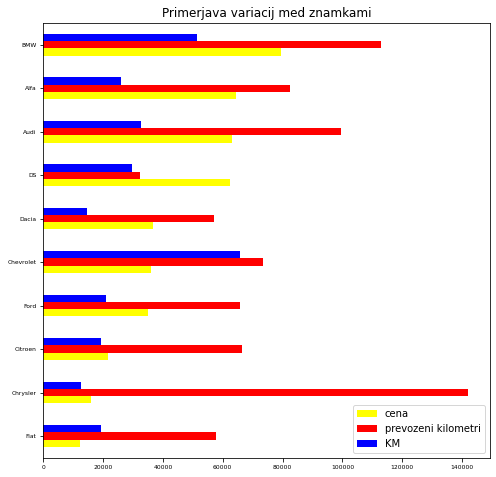

In [36]:
df4 = df[df["leto prozivodnje"] != "null"]
df4 = df4[df4["leto prozivodnje"] != ""]
df4 = df4[df4['cena'].notna()]
df4 = df4.drop(["prva registracija"], axis=1)
df4 = df4.groupby("znamka").std()
df4["KM"] = df4["KM"]*1000
df4["cena"] = df4["cena"]*5
df4[0:10].sort_values("cena").plot.barh(figsize=(8,8), fontsize=6,  color =  ["yellow","red","blue"],
                                title = 'Primerjava variacij med znamkami').set(ylabel = '', xlabel = '')

Jasno je, da bo odklon pri prevozenih KM precej visji, kot recimo pri konjskih moceh. Zgornji graf tako ne prikazuje dejanskih vrednosti ampak jih primerja med znamkami. Vidimo, da ima največjo variacijo cen BMW, ki pa ima tudi visoko variacijo pri konjskih močeh in pri prevoženih kilometrih.

Vprašamo se v kakšnem razmerju je starost avtomobila in prevoženi kilometri, predvidevamo, da bodo starejši avtomobili imeli več prevoženih kilometrov.

<AxesSubplot:title={'center':'Graf prevozenih kilometrov glede na starost'}, xlabel='leto prozivodnje', ylabel='prevozeni kilometri'>

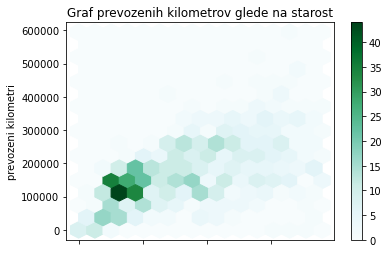

In [24]:
df5 = df[df["leto prozivodnje"] != "null"]
df5 = df5[df5["leto prozivodnje"] != ""]
df5 = df5[df5['leto prozivodnje'].notna()]
df5["leto prozivodnje"] = pd.to_numeric(df5["leto prozivodnje"])
df5['prevozeni kilometri'] =pd.to_numeric(df5['prevozeni kilometri'])
df5["leto prozivodnje"] = 2020 - df5["leto prozivodnje"]

# VZAMIMO SAMO AVTE MLAJSE OD LET 

df5 = df5[df5["leto prozivodnje"] < 20]

df5.plot.hexbin(x = "leto prozivodnje", y ='prevozeni kilometri', gridsize = 15, title = 
                                    'Graf prevozenih kilometrov glede na starost')

Iz grafa razberemo, da razmerje na začeteku raste približno "linearno", ko pa pride do neke starosti pa se rast upočasni. Iz grafa razberemo tudi to, da je stereotipno vozilo star približno 7,8 let in ima 100 - 150 tisoč prevoženih kilometrov.

Za konec pa si poglejmo še nekatere neraziskane porazdelitve avtomobilov na avtonetu.

Text(0.5, 1.0, 'Porazdelitev avtomobilov glede na "starost"')

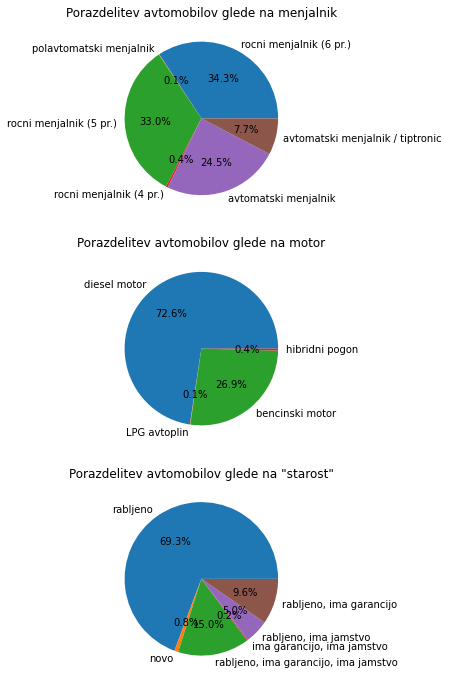

In [25]:
fig, (x1,x2,x3) = plt.subplots(3,1,figsize=(10,12)) 

#

values = list(df['menjalnik'].value_counts())
labels = list(df['menjalnik'].value_counts().index.tolist())

myorder = [0, 5, 1, 4, 2, 3]

values  = [values[i] for i in myorder]
labels = [labels[i] for i in myorder]

x1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie


values = list(df['gorivo'].value_counts())
labels = list(df['gorivo'].value_counts().index.tolist())

myorder = [0, 3, 1, 2]

values  = [values[i] for i in myorder]
labels = [labels[i] for i in myorder]

x2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie

values = list(df['starost'].value_counts())
labels = list(df['starost'].value_counts().index.tolist())

myorder = [0, 4, 1,5,3,2]

values  = [values[i] for i in myorder]
labels = [labels[i] for i in myorder]
x3.pie(values,labels = labels,autopct = '%1.1f%%') #plot third pie

x1.set_title('Porazdelitev avtomobilov glede na menjalnik')
x2.set_title('Porazdelitev avtomobilov glede na motor')
x3.set_title('Porazdelitev avtomobilov glede na "starost"')